In [1]:
%pip install pandas
%pip install opencv-python
%pip install scikit-learn
%pip install tensorflow
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 33.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 30.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 22.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 24.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 30.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from matplotlib import pyplot as plt

2025-04-07 17:12:30.806660: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-07 17:12:31.000188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744013551.075248   19478 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744013551.097703   19478 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-07 17:12:31.276721: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# データの読み込みと前処理
csv_path = '/mnt/c/Users/admin/Documents/testB/data/train.csv'
data_dir = '/mnt/c/Users/admin/Documents/testB/data/train/train'

df = pd.read_csv(csv_path)
df_filtered = df[df['gender_status'] != 5]

1回目の調整

In [ ]:
#x_data = []
#y_data = []

#for index, row in df_filtered.iterrows():
    #img_path = os.path.join(data_dir, row['image'])
    #img = cv2.imread(img_path)
    #if img is not None:
        #img = cv2.resize(img, (100, 100))
        #x_data.append(img)
        #y_data.append(row['gender_status'])
    #else:
        #print(f"画像が見つからないか、読み込めませんでした: {img_path}")

#x_data = np.array(x_data)
#y_data = np.array(y_data)

#class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_data), y=y_data)
#class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

#x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.3, random_state=42, stratify=y_data)
#x_train, y_train = shuffle(x_train, y_train, random_state=42)
#x_val, y_val = shuffle(x_val, y_val, random_state=42)

#y_train_categorical = to_categorical(y_train, num_classes=8)
#y_val_categorical = to_categorical(y_val, num_classes=8)

In [3]:
import tensorflow as tf

print("Available GPUs:", tf.config.list_physical_devices('GPU'))

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
import tensorflow as tf

# GPUデバイスのリストを取得
devices = tf.config.list_physical_devices('GPU')

# GPUが存在するか確認
if devices:
    # 最初のGPUを設定
    tf.config.set_visible_devices(devices[0], 'GPU')
    print("GPUが使用可能として設定されました！")
else:
    print("GPUが見つかりません。")

GPUが使用可能として設定されました！


In [5]:
# GPUが利用可能か確認
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [15]:
print("GPU available:", tf.test.is_gpu_available())
print("GPU devices:", tf.config.list_physical_devices('GPU'))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU available: True
GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


I0000 00:00:1744012263.916394   11925 gpu_device.cc:2022] Created device /device:GPU:0 with 46009 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:c3:00.0, compute capability: 8.6


2回目の調整

In [6]:
def center_crop_and_resize(img, size):
    h, w, _ = img.shape
    min_dim = min(h, w)
    start_x = (w - min_dim) // 2
    start_y = (h - min_dim) // 2
    cropped_img = img[start_y:start_y + min_dim, start_x:start_x + min_dim]
    resized_img = cv2.resize(cropped_img, (size, size))
    return resized_img

x_data = []
y_data = []

for index, row in df_filtered.iterrows():
    img_path = os.path.join(data_dir, row['image'])
    img = cv2.imread(img_path)
    if img is not None:
        img = center_crop_and_resize(img, 100)
        x_data.append(img)
        y_data.append(row['gender_status'])
    else:
        print(f"画像が見つからないか、読み込めませんでした: {img_path}")

# 拡張パラメータを設定してImageDataGeneratorを初期化
datagen = ImageDataGenerator(
   rotation_range=360,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# x_dataとy_dataをnumpy配列に変換（まだ変換されていない場合）
x_data = np.array(x_data)
y_data = np.array(y_data)

# データジェネレータをトレーニングデータに適用
datagen.fit(x_data)

# ジェネレータを使用して画像を拡張
augmented_images = []
augmented_labels = []

for x, y in zip(x_data, y_data):
    x = x.reshape((1,) + x.shape)  # 画像を(1, height, width, channels)にリシェイプ
    i = 0
    for batch in datagen.flow(x, batch_size=1):
        augmented_images.append(batch[0])
        augmented_labels.append(y)
        i += 1
        if i >= 10:  # 画像ごとの拡張
            break

# 拡張データをnumpy配列に変換
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# 元のデータと拡張データを結合
x_data = np.concatenate((x_data, augmented_images), axis=0)
y_data = np.concatenate((y_data, augmented_labels), axis=0)

#クラスの不均等調整
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_data), y=y_data)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

#trainデータとtestデータをシャッフルしてクラスの均等性を揃える
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.3, random_state=42, stratify=y_data)
x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_val, y_val = shuffle(x_val, y_val, random_state=42)

y_train_categorical = to_categorical(y_train, num_classes=8)
y_val_categorical = to_categorical(y_val, num_classes=8)

In [7]:
# ResNet50のベースモデルを定義（ImageNetの重みを使用）
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# ベースモデルの層を固定（訓練しない）
for layer in base_model.layers:
    layer.trainable = False

I0000 00:00:1744013725.523786   19478 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46009 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:c3:00.0, compute capability: 8.6


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
# 新しいモデルの定義
inputs = Input(shape=(100, 100, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
#x = Dense(256, activation='relu')(x)
#x = Dropout(0.25)(x)
outputs = Dense(8, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [9]:
history = model.fit(x_train, y_train_categorical
                    , epochs=500, batch_size=512
                    , validation_data=(x_val, y_val_categorical)
                    , class_weight=class_weights_dict, callbacks=[early_stopping]
                    , shuffle=True)

Epoch 1/500


I0000 00:00:1744013761.625365   20072 service.cc:148] XLA service 0x7f2970014070 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744013761.625904   20072 service.cc:156]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2025-04-07 17:16:01.786247: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744013762.816304   20072 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-07 17:16:03.366345: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4906_0', 16 bytes spill stores, 16 bytes spill loads

2025-04-07 17:16:03.738028: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4906', 204 bytes spi

 2/64 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.1836 - loss: 2.0080  

I0000 00:00:1744013769.333916   20072 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/64 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.2055 - loss: 1.8387

2025-04-07 17:16:16.248593: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4906', 224 bytes spill stores, 224 bytes spill loads

2025-04-07 17:16:16.447016: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5190', 116 bytes spill stores, 116 bytes spill loads



64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.2061 - loss: 1.8363

2025-04-07 17:16:29.296231: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1722', 224 bytes spill stores, 224 bytes spill loads



64/64 ━━━━━━━━━━━━━━━━━━━━ 36s 360ms/step - accuracy: 0.2066 - loss: 1.8340 - val_accuracy: 0.3212 - val_loss: 1.7262
Epoch 2/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.3414 - loss: 1.4079 - val_accuracy: 0.4070 - val_loss: 1.5202
Epoch 3/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.4178 - loss: 1.2277 - val_accuracy: 0.4465 - val_loss: 1.4357
Epoch 4/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.4574 - loss: 1.1275 - val_accuracy: 0.4794 - val_loss: 1.3563
Epoch 5/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.4840 - loss: 1.0729 - val_accuracy: 0.5024 - val_loss: 1.3026
Epoch 6/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.5023 - loss: 1.0300 - val_accuracy: 0.5150 - val_loss: 1.2649
Epoch 7/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.5226 - loss: 1.0015 - val_accuracy: 0.5266 - val_loss: 1.2360
Epoch 8/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.5365 - loss: 0.9705 - val_accuracy: 0.542

In [10]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │        16,392 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,636,890 (90.17 MB)

 Trainable params: 16,392 (64.03 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 32,786 (128.07 KB)

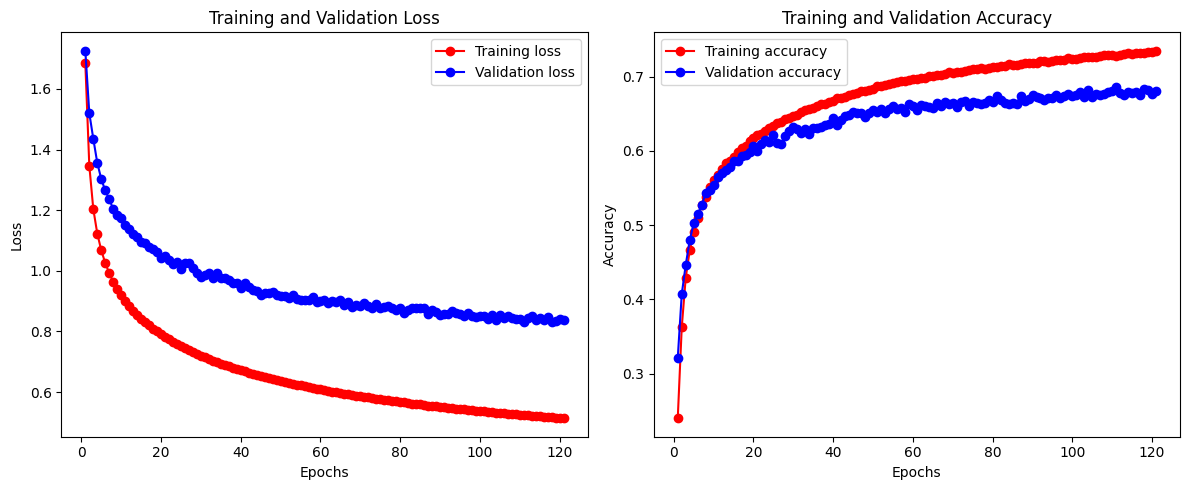

In [11]:
# エポック数
epochs = range(1, len(history.history['loss']) + 1)

# 損失のプロット
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], 'ro-', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'bo-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 精度のプロット
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], 'ro-', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'bo-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# プロットの表示
plt.tight_layout()
plt.show()

In [12]:
# テストデータのディレクトリパスを設定
test_data_dir = '/mnt/c/Users/admin/Documents/testB/data/test/test'

# テストデータの画像を読み込み、前処理
x_test = []
image_names = []

for img_name in os.listdir(test_data_dir):
    img_path = os.path.join(test_data_dir, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (100, 100))
        x_test.append(img)
        image_names.append(img_name)
    else:
        print(f"画像が見つからないか、読み込めませんでした: {img_path}")

# NumPy配列に変換
x_test = np.array(x_test).reshape(-1,100, 100, 3)

# 予測を行う
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# 結果をDataFrameにまとめる
results_df = pd.DataFrame({'image': image_names, 'gender_status': predicted_classes})

# 結果をCSVファイルに保存
results_csv_path = '/mnt/c/Users/admin/Documents/testB/data/predictions1.csv'
results_df.to_csv(results_csv_path, index=False)

print(f"予測結果が {results_csv_path} に保存されました。")

2025-04-07 17:44:36.691047: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1678_0', 16 bytes spill stores, 16 bytes spill loads

2025-04-07 17:44:37.030668: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1678', 204 bytes spill stores, 204 bytes spill loads



34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step
予測結果が /mnt/c/Users/admin/Documents/testB/data/predictions1.csv に保存されました。
